In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('Salary_cleaned')

In [7]:
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company_text,State_for_job,State_for_job_Hq,Age_of_Company,python_yn,Rstudio_yn,Spark_yn,SQL_yn,Excel_yn,aws_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\n,NM,0,48,1,0,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\n,FL,1,11,1,0,1,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\n,WA,1,56,1,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\n,NY,1,23,1,0,0,1,1,0


In [9]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'State_for_job', 'State_for_job_Hq', 'Age_of_Company',
       'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn'],
      dtype='object')

In [10]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [11]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [12]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [13]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [18]:
# Fix state Los Angeles 
df['job_state']= df.State_for_job.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state']

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
737    MA
738    TN
739    PA
740    PA
741    OH
Name: job_state, Length: 742, dtype: object

In [19]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [22]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [23]:
df.columns



Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'State_for_job', 'State_for_job_Hq', 'Age_of_Company',
       'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn',
       'job_simp', 'seniority', 'job_state', 'desc_len', 'num_comp'],
      dtype='object')

In [28]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1) 
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1) 

In [31]:
df[['max_salary','min_salary']]

,max_salary,min_salary
0,91,53
1,112,63
2,90,80
3,97,56
4,143,86
...,...,...
737,111,58
738,133,72
739,91,56
740,160,95


In [32]:
df['Compnany_text'] = df.Company_text.apply(lambda x: x.replace('\n',''))

In [33]:
df['Compnany_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Compnany_text, Length: 742, dtype: object

In [34]:
df.describe()

,Rating,Founded,hourly,Employer_provided,min_salary,max_salary,avg_salary,State_for_job_Hq,Age_of_Company,python_yn,Rstudio_yn,Spark_yn,SQL_yn,Excel_yn,aws_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,76.021563,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.512129,0.522911,0.237197,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.459851,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.500190,0.499812,0.425651,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,72.000000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,93.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'State_for_job', 'State_for_job_Hq', 'Age_of_Company',
       'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn',
       'job_simp', 'seniority', 'job_state', 'desc_len', 'num_comp',
       'Compnany_text'],
      dtype='object')

<AxesSubplot:>

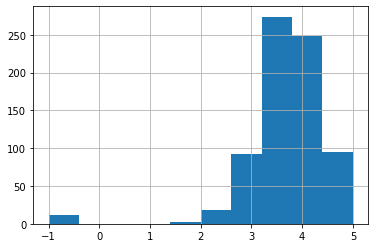

In [37]:
df.Rating.hist()

False    570
True     172
Name: Rating, dtype: int64

<AxesSubplot:>

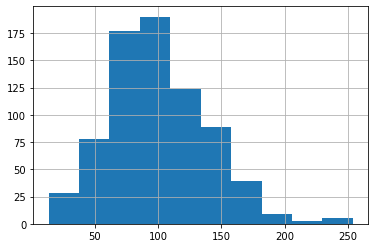

In [47]:
df.avg_salary.hist()

<AxesSubplot:>

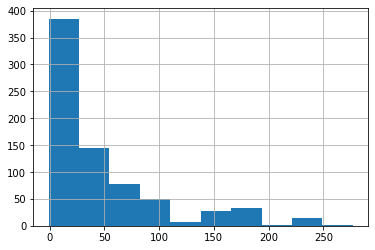

In [105]:

df.Age_of_Company.hist()

<AxesSubplot:>

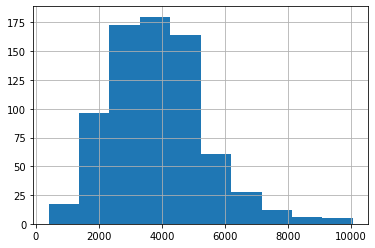

In [106]:
df.desc_len.hist()

<AxesSubplot:>

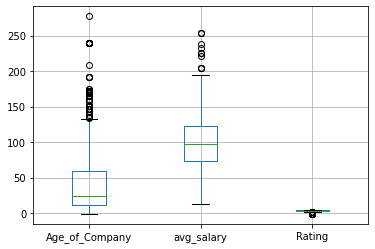

In [107]:
df.boxplot(column = ['Age_of_Company', 'avg_salary', 'Rating'])

<AxesSubplot:>

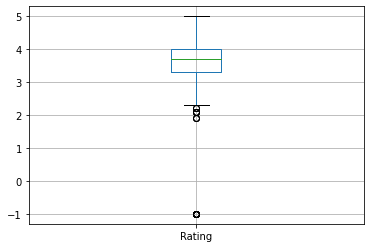

In [109]:
df.boxplot(column = 'Rating')

In [110]:
df[['Age_of_Company', 'avg_salary', 'Rating',]].corr()

,Age_of_Company,avg_salary,Rating
Age_of_Company,1.000000,0.019574,0.023162
avg_salary,0.019574,1.000000,0.013492
Rating,0.023162,0.013492,1.000000


<AxesSubplot:>

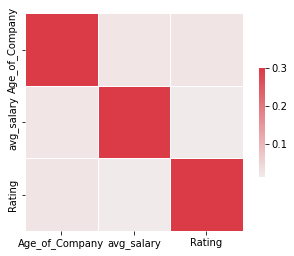

In [149]:
cmap = sns.diverging_palette( 5000, 10, as_cmap=True)
sns.heatmap(df[['Age_of_Company', 'avg_salary', 'Rating']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [150]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'State_for_job', 'State_for_job_Hq', 'Age_of_Company',
       'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn',
       'job_simp', 'seniority', 'job_state', 'desc_len', 'num_comp',
       'Compnany_text'],
      dtype='object')

In [151]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue','Employer_provided','State_for_job', 'State_for_job_Hq', 'Age_of_Company',
       'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn',
       'job_simp', 'seniority', 'job_state', 'Compnany_text']]

graph for Location: total = 200


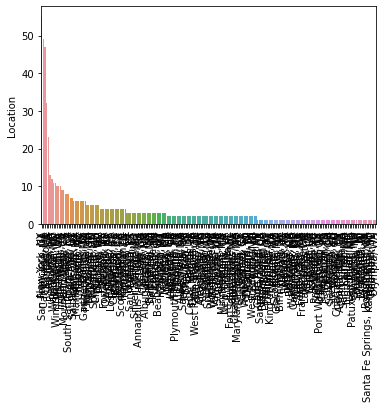

graph for Headquarters: total = 198


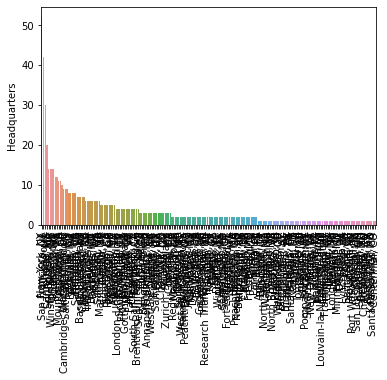

graph for Size: total = 9


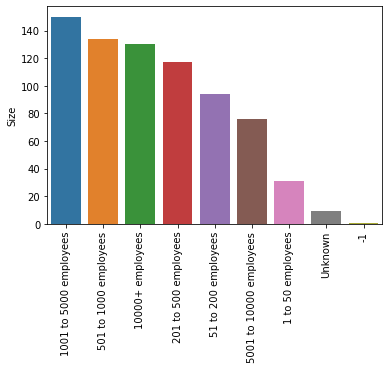

graph for Founded: total = 102


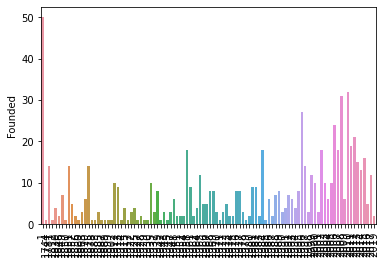

graph for Type of ownership: total = 11


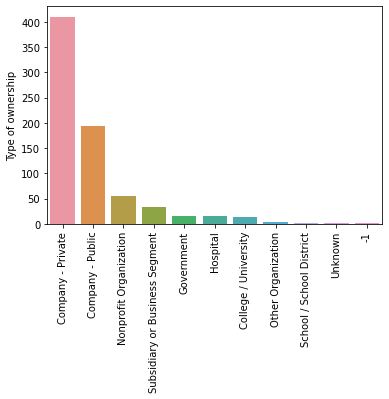

graph for Industry: total = 60


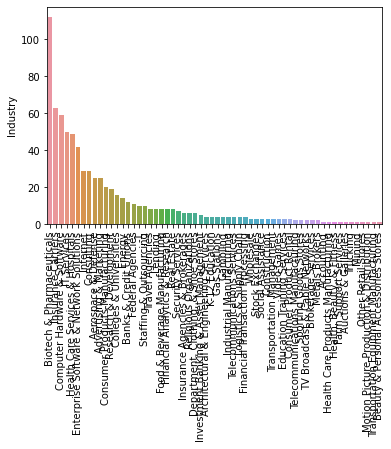

graph for Sector: total = 25


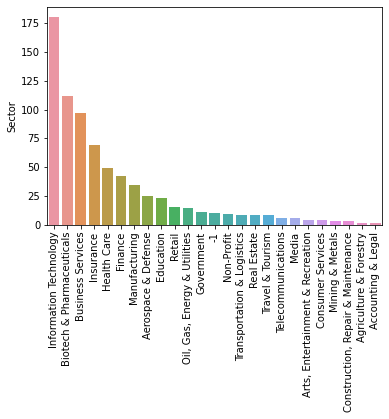

graph for Revenue: total = 14


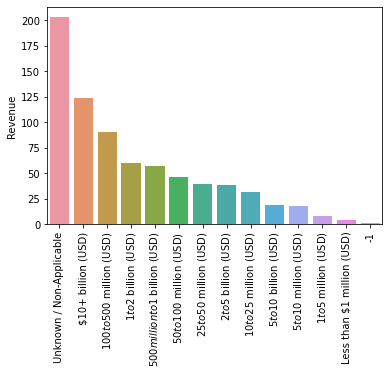

graph for Employer_provided: total = 2


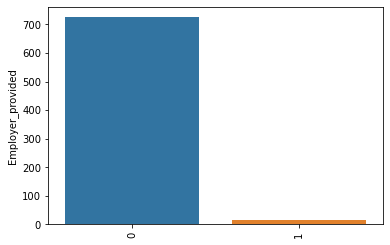

graph for State_for_job: total = 38


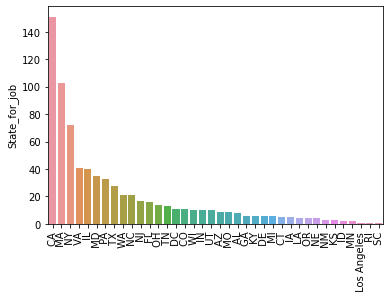

graph for State_for_job_Hq: total = 2


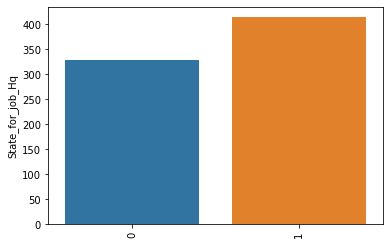

graph for Age_of_Company: total = 102


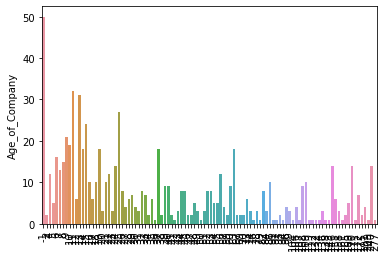

graph for python_yn: total = 2


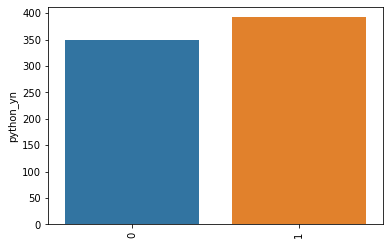

graph for Rstudio_yn: total = 2


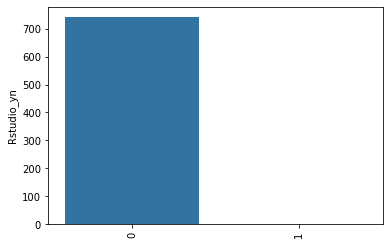

graph for Spark_yn: total = 2


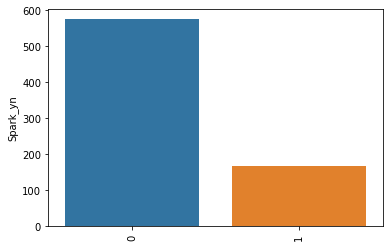

graph for SQL_yn: total = 2


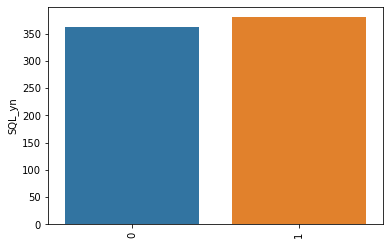

graph for Excel_yn: total = 2


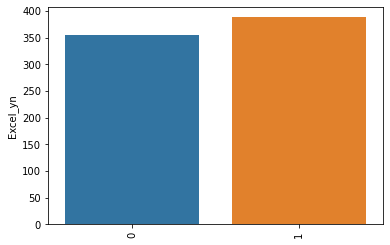

graph for aws_yn: total = 2


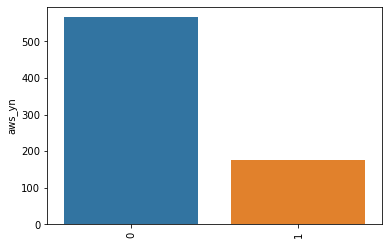

graph for job_simp: total = 7


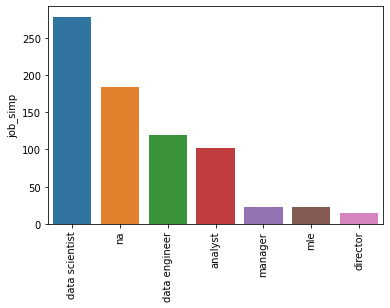

graph for seniority: total = 3


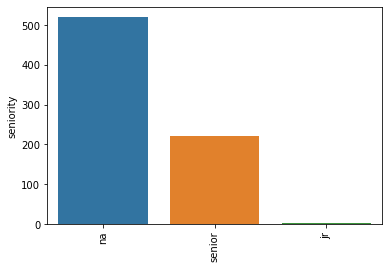

graph for job_state: total = 37


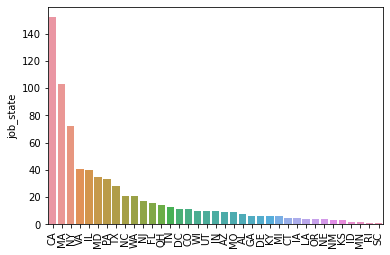

graph for Compnany_text: total = 343


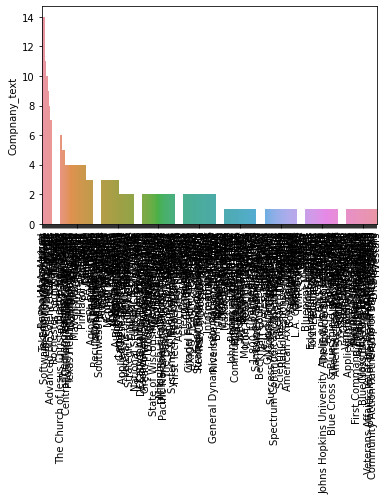

In [162]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),fontsize = 10,rotation = 90)
    plt.show()
    
    

graph for Location: total = 20


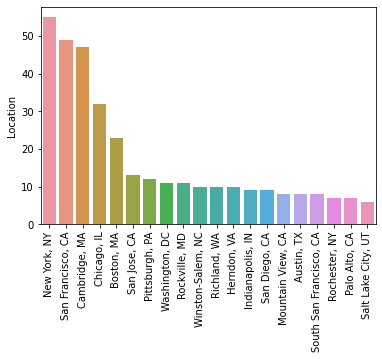

graph for Headquarters: total = 20


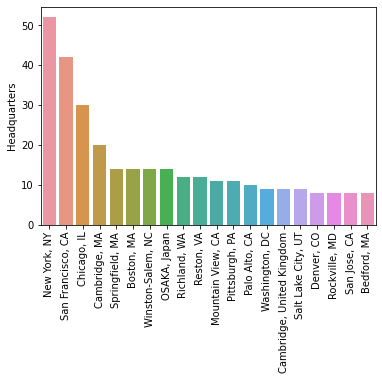

graph for Founded: total = 20


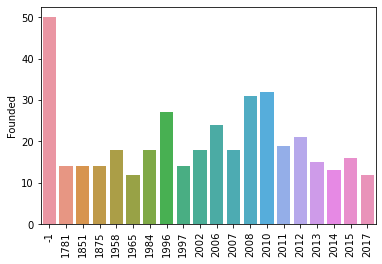

graph for Industry: total = 20


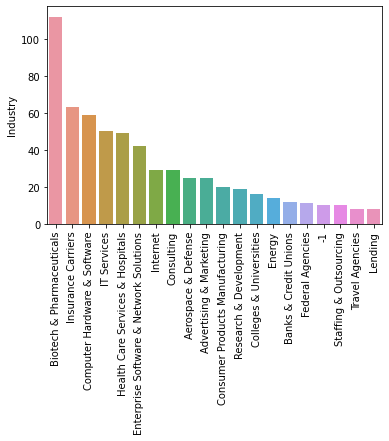

graph for Sector: total = 20


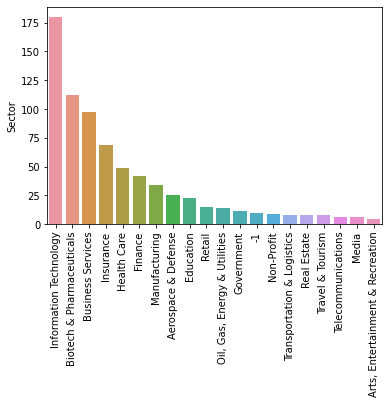

graph for Compnany_text: total = 20


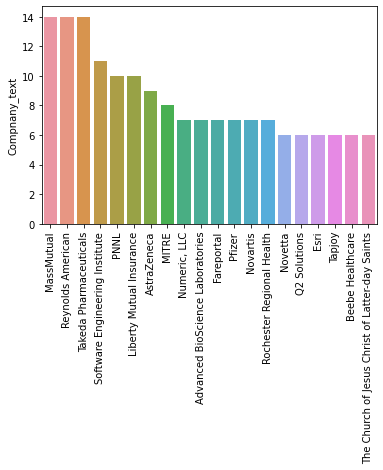

In [164]:
df_cat = df[['Location', 'Headquarters', 'Founded', 'Industry', 'Sector','Compnany_text']]

for i in df_cat.columns:
    
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),fontsize = 10,rotation = 90)
    plt.show()

In [166]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'State_for_job', 'State_for_job_Hq', 'Age_of_Company',
       'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn',
       'job_simp', 'seniority', 'job_state', 'desc_len', 'num_comp',
       'Compnany_text'],
      dtype='object')

In [171]:
pd.pivot_table(df,index = ['job_simp', 'seniority'], values = 'avg_salary' )

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [180]:
pd.pivot_table(df,index = ['job_state','job_simp'], values = 'avg_salary' ).sort_values('job_state',ascending = False )

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [190]:
pd.pivot_table(df,index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count' ).sort_values('avg_salary',ascending = False )

avg_salary
job_state job_simp                  
CA        data scientist          68
MA        na                      46
NY        data scientist          40
MA        data scientist          30
CA        na                      27
          data engineer           25
VA        data scientist          18
CA        analyst                 18
WA        data scientist          17
MD        na                      16
IL        data scientist          15
NY        analyst                 14
MD        data scientist          13
TX        data scientist          13
NC        na                      12
MA        data engineer           12
NY        na                      12
VA        data engineer           10
TN        data engineer           10
CA        manager                  9
IL        data engineer            8
TX        data engineer            8
PA        na                       8
          analyst                  8
          mle                      7
TX        na                       7
FL        data scientist           7
OH        data scientist           7
NC        data engineer            6
MA        director                 6
IL        na                       6
          director                 6
NJ        analyst                  6
FL        analyst                  6
DE        na                       6
PA        data scientist           6
VA        analyst                  6
DC        data scientist           5
CA        mle                      5
AZ        data engineer            5
MA        manager                  5
VA        na                       5
AL        analyst                  5
NY        data engineer            4
OH        analyst                  4
NJ        data scientist           4
NE        na                       4
UT        analyst                  4
MI        data scientist           4
MA        analyst                  4
KY        na                       4
DC        data engineer            4
IN        data engineer            4
          na                       4
WI        na                       4
MD        data engineer            3
NM        data scientist           3
IA        data engineer            3
GA        data scientist           3
OH        na                       3
OR        data scientist           3
FL        data engineer            3
PA        manager                  3
CT        na                       3
CO        na                       3
          data scientist           3
          data engineer            3
UT        data engineer            3
          data scientist           3
WA        analyst                  3
WI        analyst                  3
          data scientist           3
IL        analyst                  3
GA        na                       3
MD        analyst                  3
MO        data scientist           3
          na                       3
KS        mle                      3
NC        data scientist           3
TN        analyst                  2
MO        analyst                  2
VA        mle                      2
CT        data scientist           2
NJ        manager                  2
AL        na                       2
DC        analyst                  2
LA        data engineer            2
IN        data scientist           2
KY        data scientist           2
MI        manager                  2
NJ        data engineer            2
IA        analyst                  2
NY        mle                      2
IL        mle                      2
ID        analyst                  2
NJ        director                 2
AZ        na                       2
WA        na                       1
CO        analyst                  1
MN        analyst                  1
AL        data engineer            1
AZ        analyst                  1
          data scientist           1
NJ        na                       1
MN        data engineer            1
MO        manager                  1
CO        mle                 

In [191]:
pd.pivot_table(df[df.job_simp == 'data scientist' ], index = 'job_state',values = 'avg_salary' ).sort_values('avg_salary',ascending = False )

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [192]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'State_for_job', 'State_for_job_Hq', 'Age_of_Company',
       'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn',
       'job_simp', 'seniority', 'job_state', 'desc_len', 'num_comp',
       'Compnany_text'],
      dtype='object')

In [194]:
df_pivot = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'Employer_provided',    'python_yn', 'Rstudio_yn', 'Spark_yn', 'SQL_yn', 'Excel_yn', 'aws_yn', 'Type of ownership','avg_salary']]


In [207]:
for (i) in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index = i , values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [214]:
pd.pivot_table(df_pivot, index = 'Revenue', columns  = 'python_yn', values  = 'avg_salary' ) 


python_yn,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),80.875000,119.843750
$10+ billion (USD),102.393939,129.698276
$100 to $500 million (USD),67.319149,100.068182
$2 to $5 billion (USD),79.000000,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


In [213]:
pd.pivot_table(df_pivot, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


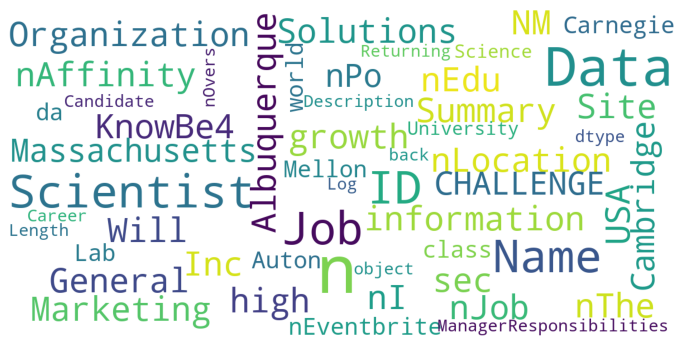

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['Job Description'])   